## Observations and Insights 

In [ ]:
## Observations and Insights 
# Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

#1. From the summary stats table, we can see that the Ramicane or Capomulin drug regimens may be the most effective since it shows that mice undergoing these drug regimens have the lowest avergage tumor volume. 
#2. We can infer that a good representation of male mice and female mice were studied from the pie chart, showing an almost 50/50 total of male vs female mice.
#3. We can infer that there is a positive association between mice weight and tumor volume from our Linear Regression Model. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df = combined_df.fillna(0)
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice = len(combined_df['Mouse ID'])
total_mice

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data = combined_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'last').reset_index(drop = True)
mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice1 = len(mice_data['Mouse ID'])
total_mice1

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_mice = mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_mice = mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_mice = (mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)']).var()
std_mice = (mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)']).std()
sems_mice = (mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)']).sem()


stats_df = pd.DataFrame({'Mean of Tumor Volume': mean_mice, 'Median of Tumor Volume': median_mice, 'Variace of Tumor Volume': var_mice, 'Standard Deviation of Tumor Volume':std_mice,  'SEM of Tumor Volume':sems_mice})
stats_df


,Mean of Tumor Volume,Median of Tumor Volume,Variace of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoint'>

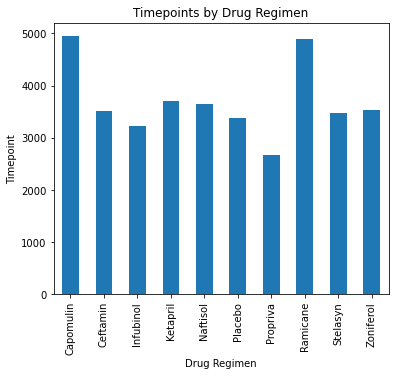

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
sum_mice = (mice_data.groupby('Drug Regimen')['Timepoint']).sum()
sum_mice.plot(kind='bar', title='Timepoints by Drug Regimen', ylabel='Timepoint',
         xlabel='Drug Regimen', figsize=(6, 5))

<function matplotlib.pyplot.show(close=None, block=None)>

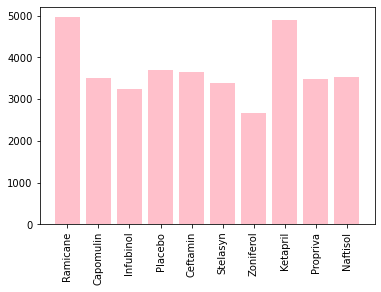

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimens = mice_data['Drug Regimen'].unique()
timepoint = sum_mice
plt.bar(drug_regimens, timepoint, color="pink", align="center")
plt.xticks(rotation=90)
plt.show

<AxesSubplot:title={'center':'Sex of Mice'}>

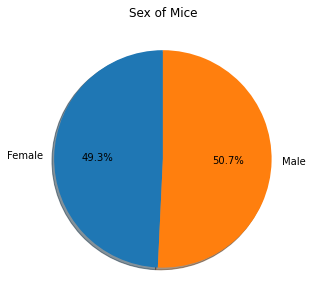

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = (mice_data.groupby('Sex')['Mouse ID']).count()
sex_mice.plot(kind='pie', title='Sex of Mice', ylabel = '', figsize=(6, 5), autopct="%1.1f%%", shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x7fad36931430>,
 [Text(-1.099701533132135, 0.025622998006324282, 'Female'),
  Text(1.099701530733132, -0.025623100967813027, 'Male')],
 [Text(-0.5998371998902553, 0.013976180730722335, '49.3%'),
  Text(0.5998371985817083, -0.013976236891534377, '50.7%')])

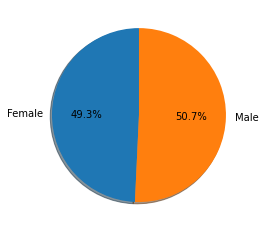

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
male = sex_mice['Male']
female = sex_mice['Female']
new = [female, male]
plt.pie(new, labels=sex, autopct="%1.1f%%", shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mice_regimen = mice_data.set_index("Drug Regimen")
final_tumorvol = mice_regimen.loc[('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'), ["Tumor Volume (mm3)", "Timepoint"]]
final_tv = final_tumorvol.groupby(level=0).agg(['last']).stack()
final_tv

,,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Capomulin,last,46.539206,15
Ceftamin,last,64.729837,45
Infubinol,last,62.754451,45
Ramicane,last,44.183451,15


In [19]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

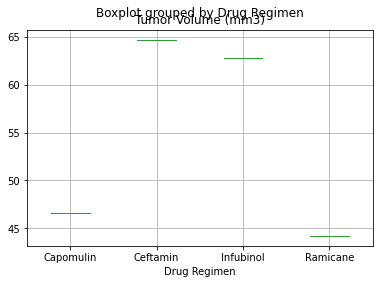

In [101]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig, ax = plt.subplots()
#ax.set_title('Temperatures at LAX')
#ax.set_ylabel('Temperature (ºF)')
#final_tv.boxplot()
#plt.show()
final_tv.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')

## Line and Scatter Plots

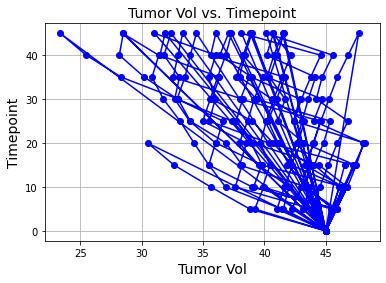

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot1 = mice_regimen.loc[('Capomulin'), ["Tumor Volume (mm3)", "Timepoint"]]

plt.plot(lineplot1['Tumor Volume (mm3)'], lineplot1['Timepoint'], color='blue', marker='o')
plt.title('Tumor Vol vs. Timepoint', fontsize=14)
plt.xlabel('Tumor Vol', fontsize=14)
plt.ylabel('Timepoint', fontsize=14)
plt.grid(True)
plt.show()

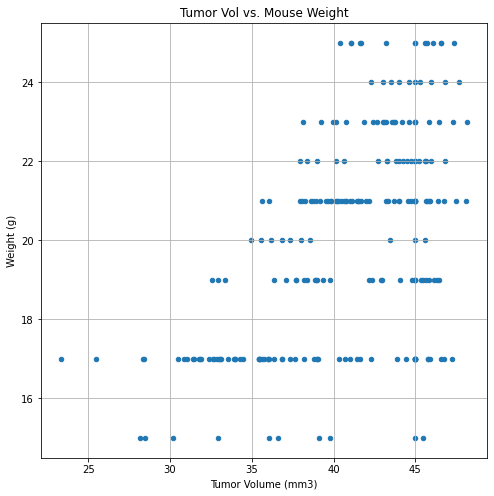

In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterplot = mice_regimen.loc[['Capomulin'], ("Tumor Volume (mm3)", "Weight (g)")]
scatterplot.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", grid=True, figsize=(8,8), title="Tumor Vol vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mice_regimen.loc[['Capomulin'], ("Weight (g)")]
tumor_vol53 = mice_regimen.loc[['Capomulin'], ("Tumor Volume (mm3)")]
correlation = st.pearsonr(mouse_weight, tumor_vol53)
print(f"The correlation coefficient between mouse weight and tumor volume is {round(correlation[0],2)}.")

The correlation coefficient between mouse weight and tumor volume is 0.53.


<AxesSubplot:xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

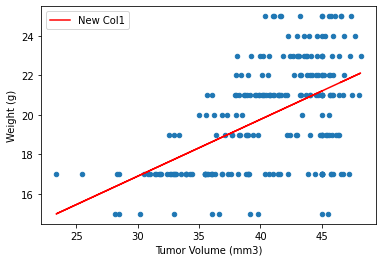

In [84]:
#Linear Regression Model
d = np.polyfit(scatterplot["Tumor Volume (mm3)"],scatterplot["Weight (g)"],1)
f = np.poly1d(d)
scatterplot.insert(1,"New Col1",f(scatterplot["Tumor Volume (mm3)"]))
ax = scatterplot.plot.scatter(x = "Tumor Volume (mm3)",y="Weight (g)")
scatterplot.plot(x="Tumor Volume (mm3)", y="New Col1",color="Red",ax=ax)